In [6]:
import sys
sys.path.append('../')

In [44]:
import argparse
from dataset.get_dataset import getDataset
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
import torch

In [10]:
class args_struct:
    def __init__(self):
        self.dataroot = '../../data/DiscRegion/DiscRegion/'
        self.rater_num = 6
        self.img_width = 256
        self.img_height = 256
        self.dataset = 'RIGA'
        self.validate = True
        self.standardize = False
        self.random_seed = 27

In [11]:
args = args_struct()
train_set, valid_set, test_set = getDataset(args, validate=args.validate)

In [12]:
train_loader = DataLoader(train_set, batch_size=4, shuffle=True, num_workers=4, pin_memory=True)

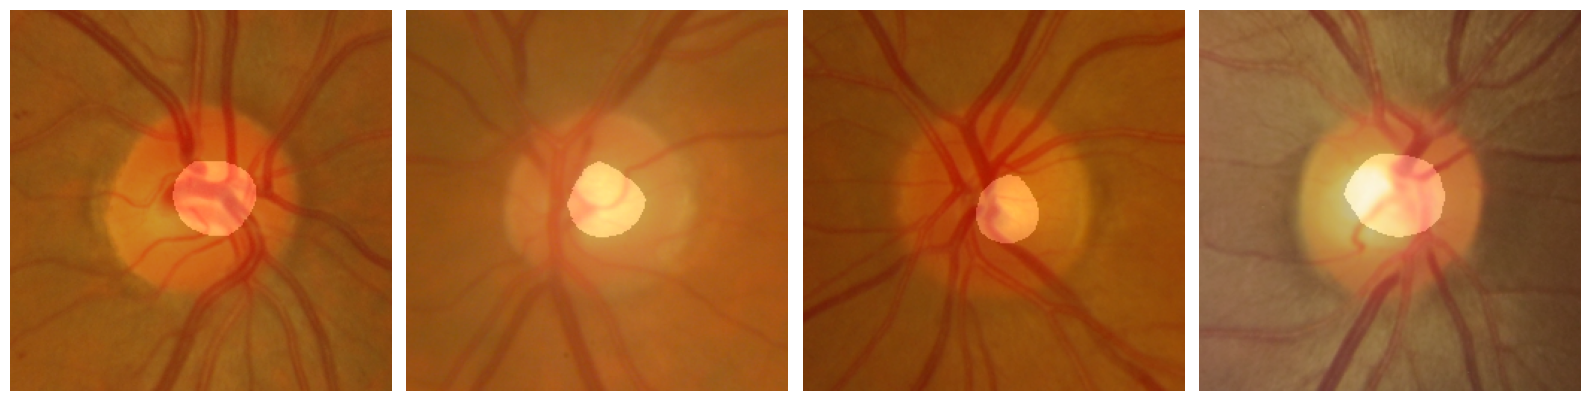

In [37]:
batch_data = next(iter(train_loader))

plt.figure(figsize=(16, 16))
for i,(img,mask) in enumerate(zip(batch_data['image'], batch_data['mask'])):
    img = ((img.permute(1,2,0))*255.0).numpy().astype(np.uint8)
    plt.subplot(2, 4, i+1)
    plt.imshow(img,vmin=0,vmax=255)
    plt.imshow(get_intersection_mask(mask[0], mask[2])[1].squeeze().numpy(), alpha=0.2, cmap='gray')
    plt.axis('off')
    plt.subplots_adjust(wspace=None, hspace=0.1)

plt.tight_layout()

In [24]:
len(batch_data['mask'])

6

### Check intersection, unions

In [53]:
def get_intersection_mask(mask1, mask2):
    intersection = (mask1 * mask2)
    return intersection


def get_union_mask(mask1, mask2):
    intersection = (mask1 * mask2)
    total = (mask1 + mask2)
    union = total - intersection
    return union


def get_intersection_mask_flat(mask1, mask2):
    original_shape = mask1.shape
    mask1_flat = mask1.view(-1)
    mask2_flat = mask2.view(-1)

    intersection = (mask1_flat * mask2_flat).view(original_shape)
    return intersection


def get_union_mask_flat(mask1, mask2):
    original_shape = mask1.shape
    mask1_flat = mask1.view(-1)
    mask2_flat = mask2.view(-1)

    intersection = (mask1_flat * mask2_flat)
    total = (mask1_flat + mask2_flat)

    return (total - intersection).view(original_shape)


In [39]:
mask1 = batch_data['mask'][0]
mask2 = batch_data['mask'][1]

In [54]:
torch.unique(mask1, return_counts=True)

(tensor([0., 1.], dtype=torch.float64), tensor([459422,  64866]))

In [55]:
torch.unique(mask2, return_counts=True)

(tensor([0., 1.], dtype=torch.float64), tensor([460099,  64189]))

In [56]:
torch.unique(get_intersection_mask(mask1, mask2), return_counts=True)

(tensor([0., 1.], dtype=torch.float64), tensor([463577,  60711]))

In [57]:
torch.unique(get_intersection_mask_flat(mask1, mask2), return_counts=True)

(tensor([0., 1.], dtype=torch.float64), tensor([463577,  60711]))

In [58]:
torch.unique(get_union_mask(mask1, mask2), return_counts=True)

(tensor([0., 1.], dtype=torch.float64), tensor([455944,  68344]))

In [59]:
torch.unique(get_union_mask_flat(mask1, mask2), return_counts=True)

(tensor([0., 1.], dtype=torch.float64), tensor([455944,  68344]))

In [30]:
mask1.shape, \
mask2.shape

(torch.Size([4, 2, 256, 256]), torch.Size([4, 2, 256, 256]))

In [31]:
mask1.min(), mask1.max()

(tensor(0., dtype=torch.float64), tensor(1., dtype=torch.float64))

In [ ]:
intersection = (output * mask).sum()
total = (output + mask).sum()
union = total - intersection

In [6]:
import cv2
import numpy as np

In [2]:
img = cv2.imread('/media/kudaibergen/TS512/projects_ts/grader_soup/data/DiscRegion/DiscRegion/Rater1/BinRushed/BinRushed1/image1.tif')

In [7]:
np.unique(img)

array([  0, 150, 255], dtype=uint8)